<a href="https://colab.research.google.com/github/Razzf/MachineLearningTests/blob/master/TFimageCls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random


In [0]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#for label in test_labels:
#  print(class_names[label])

In [122]:
rand_value = random.randint(0, 10000)



train_images = train_images/255.0
test_images = test_images/255.0

print(train_images[rand_value])



[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [123]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics='accuracy')

model.fit(train_images, train_labels, epochs= 4)

test_loss, test_accu = model.evaluate(test_images, test_labels)

print("thissss: ", test_accu)


Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5032 - accuracy: 0.8239
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8648
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8775
Epoch 4/4
313/313 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8778
thissss:  0.8777999877929688


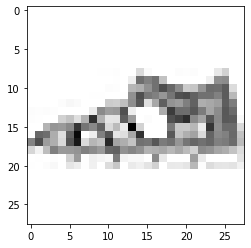

In [124]:
rand_value = random.randint(0, 10000)
plt.imshow(test_images[rand_value], cmap=plt.cm.binary)
plt.show()